In [1]:
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
from datetime import date

Using TensorFlow backend.


In [2]:
df_raw = pd.read_csv('data/train.csv')
df = df_raw.copy()

df['Age'] = df.Age.fillna(-1)
df['Embarked'] = df.Embarked.fillna('NA')

df = df.dropna()
y = df['Survived']
df = df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'])
X = pd.get_dummies(df)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
X_train.shape

(163, 11)

In [4]:
model =  Sequential()
model.add(Dense(3, input_dim=X_train.shape[1], activation='relu'))
#model.add(Dense(3, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

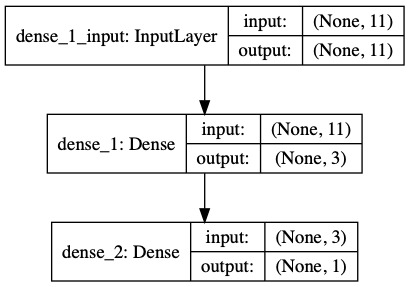

In [5]:
from keras.utils import plot_model
plot_model(model, to_file='model1.png',show_shapes=True,show_layer_names=True)

In [6]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
model.compile(loss='binary_crossentropy', optimizer='sgd')

In [8]:
model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
163/163 [==============================] - 0s 490us/step - loss: 2.5617
Epoch 2/30
163/163 [==============================] - 0s 104us/step - loss: 0.6834
Epoch 3/30
163/163 [==============================] - 0s 133us/step - loss: 0.7323
Epoch 4/30
163/163 [==============================] - 0s 162us/step - loss: 0.6986
Epoch 5/30
163/163 [==============================] - 0s 138us/step - loss: 0.6793
Epoch 6/30
163/163 [==============================] - 0s 102us/step - loss: 0.7920
Epoch 7/30
163/163 [==============================] - 0s 92us/step - loss: 0.6900
Epoch 8/30
163/163 [==============================] - 0s 177us/step - loss: 0.6952
Epoch 9/30
163/163 [==============================] - 0s 173us/step - loss: 0.6923
Epoch 10/30
163/163 [==============================] - 0s 157us/step - loss: 0.6880
Epoch 11/30
163/163 [==============================] - 0s 138us/step - loss: 0.6818
Epoch 12/30
163/163 [==============================] - 0s 189us/step - loss: 0.6868
Ep

In [9]:
prob1 = model.predict(X_val)

In [10]:
print(model.metrics_names)
print(model.evaluate(X_val, y_val,verbose=0))

['loss']
0.6653604929040118


Text(0.5, 1.0, 'Probability of class 1')

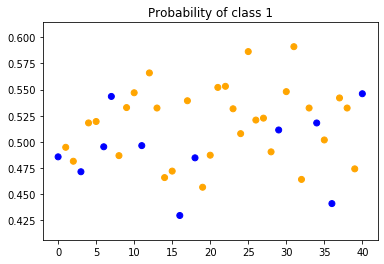

In [11]:
# plot predictions and true labels
# blue for class 0, orange for class 1
import matplotlib.pyplot as plt
color = ['blue' if y==0 else 'orange' for y in y_val]
plt.scatter(range(len(prob1)), prob1, color=color)
plt.title('Probability of class 1')

In [12]:
threshold = 0.55
pred1 = (prob1 > threshold).flatten()

print(metrics.confusion_matrix(y_val, pred1))

[[11  0]
 [25  5]]


In [13]:
# Test predictions
test = pd.read_csv('data/test.csv')
test['Age'] = test.Age.fillna(-1)
test['Embarked'] = test.Embarked.fillna('NA')
test['Fare'] = test.Fare.fillna(X_train.Fare.median())

ids = test['PassengerId']
test = test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
test = pd.get_dummies(test)
test['Embarked_NA'] = 0

In [14]:
y_test_prob = model.predict(test)
y_test_pred = pd.Series((y_test_prob.flatten() > threshold))

In [15]:
y_test_pred.value_counts()

False    363
True      55
dtype: int64

In [16]:
y_test_pred = y_test_pred.astype('int')

In [17]:
out = pd.DataFrame({'PassengerId': ids, 'Survived': y_test_pred})
out.to_csv('Titanic_DenseNN_' + str(date.today()) + '.csv', index=False)